# Objective
To test different algorithms for edge segmentation, watermark removal using `opencv`

# Setup
## Load Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [145]:
import os
from typing import Union
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from skimage.feature import peak_local_max
from skimage.segmentation import watershed, find_boundaries

parent_dir = os.path.dirname(os.path.abspath(os.path.curdir))

In [113]:
def display_figure(
        image: np.ndarray,
        cmap: Union[bool, str] = False,
        ax=None) -> None:
    draw = False
    if isinstance(cmap, bool) and cmap:
        cmap = "gray"
    elif not cmap:
        cmap = None
    if ax is None:
        draw = True
        _, ax = plt.subplots()
    ax.imshow(image, cmap=cmap)
    sns.despine(ax=ax, left=True, bottom=True)
    ax.tick_params(
        axis="both",
        labelbottom=False,
        labelleft=False,
        width=0)
    if draw:
        plt.show()
    return None

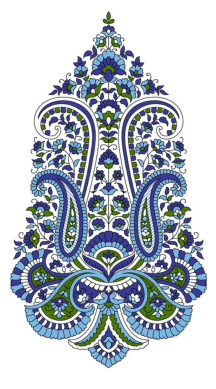

In [148]:
path = os.path.join(parent_dir, "tests", "test_data", "Persian large 5.jpg")
im1 = cv2.imread(path)
display_figure(im1)

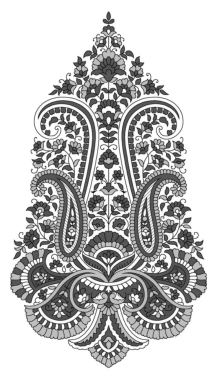

In [149]:
# convert to grayscale and show
grayscale = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
display_figure(grayscale, cmap=True)
plt.show()

# Testing edge segmentation

In [150]:
binary = cv2.threshold(grayscale, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
gs_copy = grayscale.copy()
# gs_copy[binary == 0] = 255
# binary_2 = cv2.threshold(gs_copy, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# binary_2 = cv2.copyMakeBorder(binary, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=255)
# display_figure(binary_2, cmap="gray")

C:\Users\Deepk\AppData\Local\Temp\ipykernel_13220\1995443251.py:7: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(


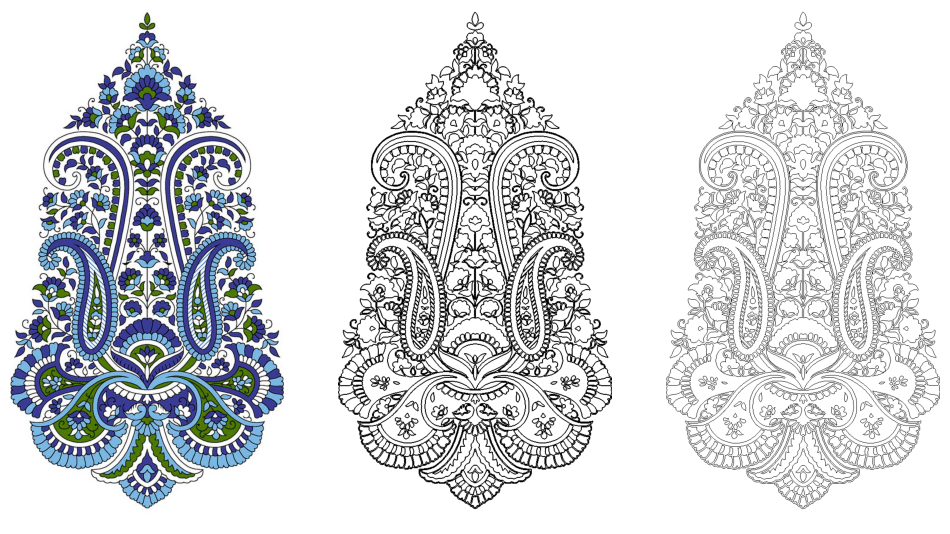

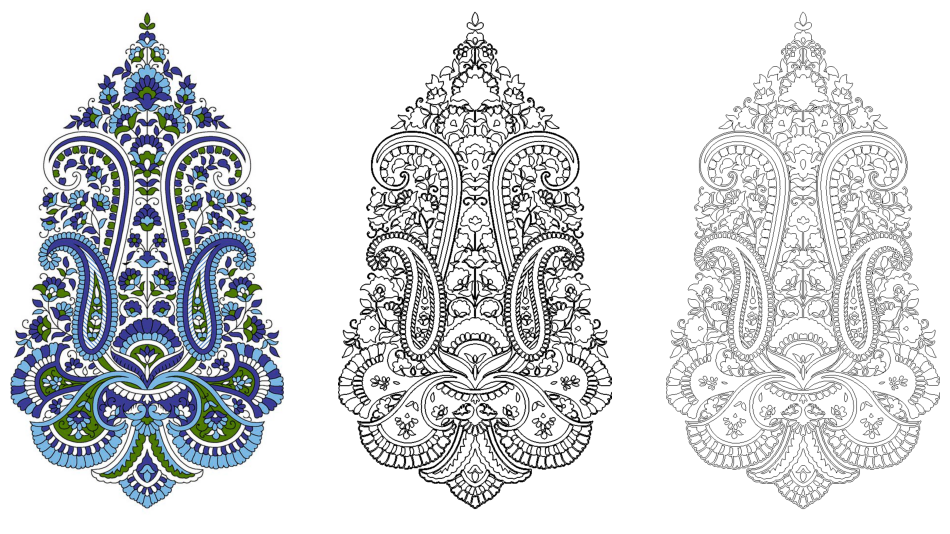

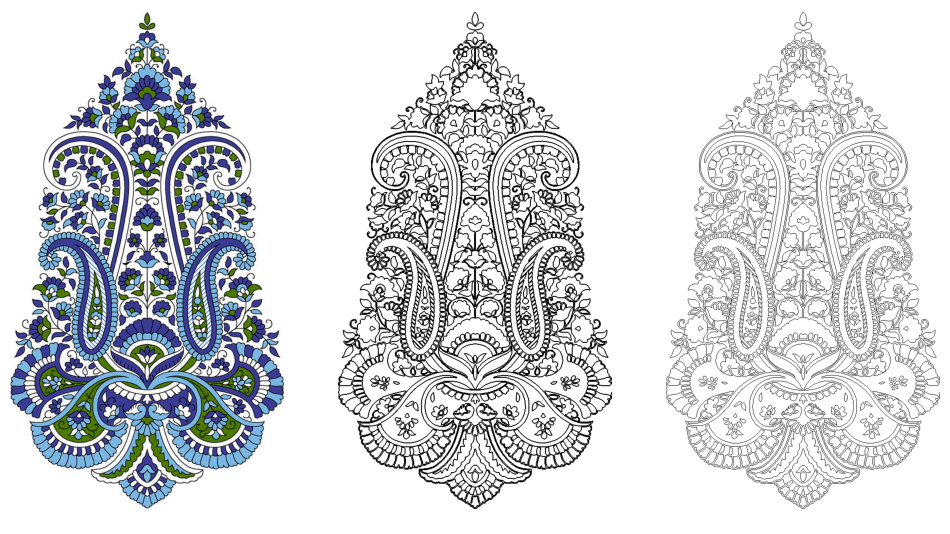

In [151]:
from scipy import ndimage

distance_map = ndimage.distance_transform_edt(binary)
md_list = [1, 10, 20, 50, 100, 120, 130, 150, 200]
md_list = [1, 3, 5]
for min_distance in md_list:
    local_max = peak_local_max(
        distance_map,
        labels=binary,
        min_distance=min_distance, indices=False)
    markers = ndimage.label(local_max)[0]
    labels = watershed(-distance_map, markers=markers, mask=binary)
    l_c = labels.copy()
    md = scipy.stats.mode(labels, axis=None, keepdims=False)[0]
    l_c[labels == md] = 0
    l_c[labels != md] = 1
    boundary_im = find_boundaries(l_c, mode="thick")
    _, axes = plt.subplots(ncols=3, figsize=(12, 8))
    display_figure(im1, ax=axes[0])
    display_figure(np.invert(boundary_im), ax=axes[1], cmap="gray")
    b2 = find_boundaries(l_c, mode="inner")
    display_figure(~b2, ax=axes[-1], cmap="gray")
    plt.savefig(
        os.path.join(parent_dir, "tests", "test_results", f"PL5_watershed_md{min_distance}.pdf"),
        transparent=True, bbox_inches="tight")
    plt.show()

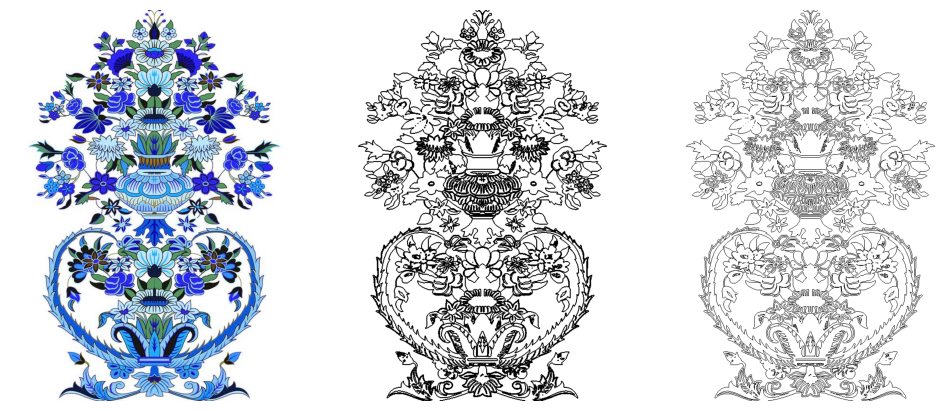

In [141]:
_, axes = plt.subplots(ncols=3, figsize=(12, 8))
display_figure(im1, ax=axes[0])
display_figure(np.invert(boundary_im), ax=axes[1], cmap="gray")
b2 = find_boundaries(l_c, mode="inner")
display_figure(~b2, ax=axes[-1], cmap="gray")
plt.show()